In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [2]:
zip_lon_lat = pd.read_csv('nj_zip-lon-lat.csv')
zip_lon_lat.head()

,zip_code,latitude,longitude
0,7001,40.582316,-74.271506
1,7002,40.662338,-74.110275
2,7003,40.809128,-74.187155
3,7004,40.882508,-74.304593
4,7005,40.932771,-74.417304


In [3]:
features = ["latitude","longitude"]
X = zip_lon_lat[features]

In [4]:
kmeans = KMeans( init="random", n_clusters=21,random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

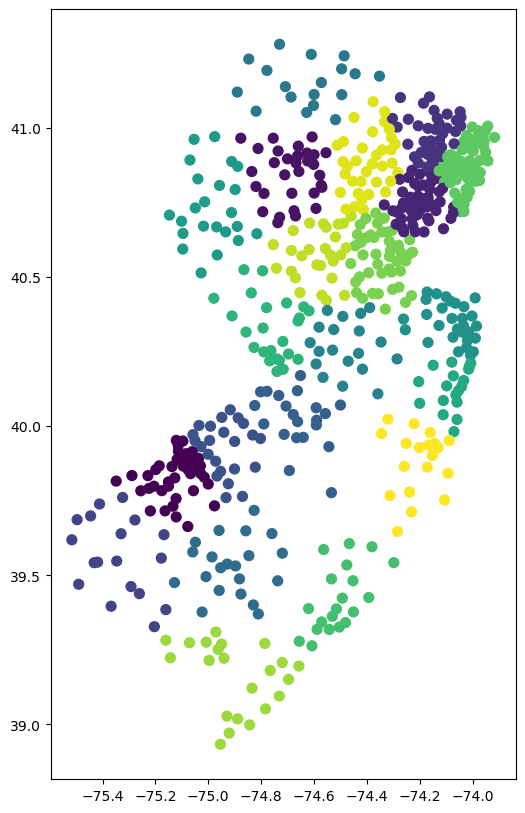

In [5]:
fig, ax = plt.subplots(figsize=(6, 10))
plt.scatter(X["longitude"], X["latitude"], c=y_kmeans, s=50, cmap='viridis')


In [6]:
zip_lon_lat['county'] = y_kmeans.tolist()
zip_lon_lat.head()

,zip_code,latitude,longitude,county
0,7001,40.582316,-74.271506,16
1,7002,40.662338,-74.110275,2
2,7003,40.809128,-74.187155,2
3,7004,40.882508,-74.304593,19
4,7005,40.932771,-74.417304,19


In [7]:
zip_lon_lat.to_csv('county.csv')